In [ ]:
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt

In [ ]:
model_a = np.array([1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1])
targets = np.array([1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1])

In [ ]:
def transform_answers(answers, targets):
  answers[answers == -1] = 0
  targets[targets==-1] = 0
  sum_targets_answers = answers + targets
  return sum_targets_answers

# Classification

## Accuracy

In [ ]:
def accuracy(model_answears,targets):
  answers  = transform_answers(model_answears,targets)
  return (len(answers[answers == 2] ) + len(answers[answers == 0] )) / len(targets)

In [ ]:
accuracy(model_a,targets)

0.7128712871287128

In [ ]:
metrics.accuracy_score(targets,model_a)

0.7128712871287128

## Precision

In [ ]:
def precision(model_answears, targets):
  tp = sum(targets[model_answears == 1])
  tp_fp = len(model_answears[model_answears == 1])
  if tp == 0:
    return 0
  return tp/tp_fp

In [ ]:
precision(model_a,targets)

0.8656716417910447

In [ ]:
metrics.precision_score(targets, model_a)

0.8656716417910447

## Recall

In [ ]:
def recall(model_answears,targets):
  tp = sum(targets[model_answears == 1])
  tp_fn = len(targets[targets == 1])
  if tp == 0:
    return 0
  return tp/tp_fn

In [ ]:
recall(model_a,targets)

0.7435897435897436

In [ ]:
metrics.recall_score(targets, model_a)

0.7435897435897436

## F-score

In [ ]:
def f_score(model_answears,targets, B = 1):
  return (1+B)*precision(model_answears,targets)*recall(model_answears,targets) / (B*B*precision(model_answears,targets) + recall(model_answears,targets))

In [ ]:
f_score(model_a,targets)

0.8

In [ ]:
metrics.f1_score(targets,model_a)

0.8

## Receiver Operating Characteristic (ROC)

In [ ]:
model_a = np.array([0.7,0.9,0.55,0.8,0.48,0.35,0.99,0.38,0.77,0.6,0.75,0.2,0.3,0.49,0.98,0.25,0.7,0.8,0.9])
targets = np.array([1  ,1  ,1   ,1  ,0   ,1   ,0   ,0   ,1   ,0  ,1   ,0  ,0  ,1   ,1   ,0   ,1  ,0  ,1  ])

In [ ]:
def fpr_function(model_answears,targets):

  fp = targets[model_answears == 1]
  fp = len(fp[fp == 0])

  tn_fn = len(targets[targets == 0])
  if fp == 0:
    return 0.
  return fp / tn_fn

In [ ]:
def roc_auc_curve(targets, probabilityes, plot = True):
  def s_trap(a,b,h):
    return h*(a+b)/2
  leinghts = len(targets)
  n = len(targets[targets == 0])
  m = len(targets[targets == 1])
  if m == 0 or n == 0:
    print("You have one class in targets, \
thats's not good, please add another class in targets, and try again.")
    return
  x, y = [0], [0]
  ta = np.array([probabilityes,targets]).T
  sort_ta = ta[ta[:,0].argsort()[::-1]].T
  previus_value = 0
  for index in range(leinghts):
    if sort_ta[0][index] == previus_value:
      if sort_ta[1][index] == 1:
        y[-1] = ((y[-1] + 1))
      if sort_ta[1][index] == 0:
        x[-1] = ((x[-1] + 1))
    else:
      if sort_ta[1][index] == 1:
        y.append((y[-1] + 1))
        x.append(x[-1])
      if sort_ta[1][index] == 0:
        x.append((x[-1] + 1))
        y.append(y[-1])
    previus_value = sort_ta[0][index]

  x = np.divide(x,n)
  y = np.divide(y,m)

  a, h0, roc_auc = 0, 0, 0
  for h1,b in zip(x,y):
    roc_auc += s_trap(a, b, h1 - h0)
    a = b
    h0 = h1
  if plot == True:
    plt.plot(x,y, color='blue', label=f'ROC-AUC = {round(roc_auc,2)}')
    plt.plot([0,1], [0,1], '--', color='black')
    plt.plot([0,0], [0,1], '--', color='gray')
    plt.plot([0,1], [1,1], '--', color='gray')

    plt.title('ROC-кривая')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

  return np.array([x,y]), roc_auc

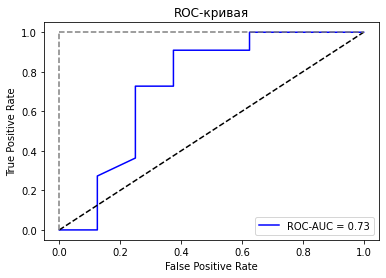

(array([[0.        , 0.125     , 0.125     , 0.125     , 0.25      ,
         0.25      , 0.25      , 0.25      , 0.375     , 0.375     ,
         0.375     , 0.5       , 0.625     , 0.625     , 0.75      ,
         0.875     , 1.        ],
        [0.        , 0.        , 0.09090909, 0.27272727, 0.36363636,
         0.45454545, 0.54545455, 0.72727273, 0.72727273, 0.81818182,
         0.90909091, 0.90909091, 0.90909091, 1.        , 1.        ,
         1.        , 1.        ]]), 0.7329545454545454)

In [ ]:
roc_auc_curve(targets,model_a)

[Дьяконов ROC-AUC](https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)

[Habr](https://habr.com/ru/company/ods/blog/328372/)

[Дополнительный источник](https://www.helenkapatsa.ru/roc-krivaia/)

[0.    0.125 0.125 0.125 0.25  0.25  0.25  0.375 0.375 0.625 0.625 1.   ] [0.         0.         0.09090909 0.27272727 0.36363636 0.54545455
 0.72727273 0.72727273 0.90909091 0.90909091 1.         1.        ] [1.99 0.99 0.98 0.9  0.8  0.75 0.7  0.6  0.49 0.38 0.35 0.2 ]


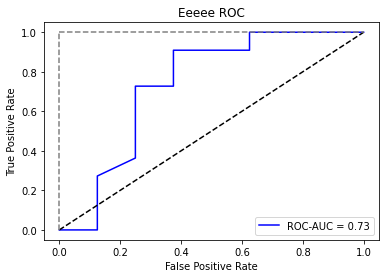

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, treshold = roc_curve(targets, model_a)
print(fpr, tpr, treshold)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue',label=f'ROC-AUC = {round(roc_auc,2)}')
plt.plot([0,1], [0,1], '--', color='black')
plt.plot([0,0], [0,1], '--', color='gray')
plt.plot([0,1], [1,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Eeeee ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def binary_roc_auc(targets, model_answers, plot = True):
  x, y = [0], [0]
  answers = []
  for a in model_answers:
    if a > 0.5:
      answers.append(1)
    else:
      answers.append(0)
  answers = np.array(answers)

  tpr = recall(answers,targets)
  fpr = fpr_function(answers,targets)
  x.append(fpr)
  y.append(tpr)
  x.append(1)
  y.append(1)  
  roc_auc = (1+tpr - fpr)/2
  print(x,y,roc_auc)
  if plot == True:
    plt.plot(x,y, color='blue', label=f'ROC-AUC = {round(roc_auc,2)}')
    plt.plot([0,1], [0,1], '--', color='black')
    plt.plot([0,0], [0,1], '--', color='gray')
    plt.plot([0,1], [1,1], '--', color='gray')

    plt.title('Бинарная ROC-кривая')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

  return np.array([x,y]), roc_auc

[0, 0.375, 1] [0, 0.8181818181818182, 1] 0.7215909090909092


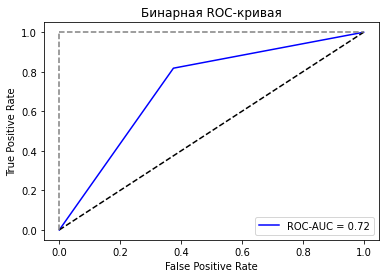

(array([[0.        , 0.375     , 1.        ],
        [0.        , 0.81818182, 1.        ]]), 0.7215909090909092)

In [ ]:
binary_roc_auc(targets, model_a)

## Precision-Recall Curve

0.7329545454545454